In [107]:
################################# K Nearest Neighbors Classifier with Python #############################

#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline

In [108]:
############################## Dataset - Electrical Grids #######################################

#Get the Data
df = pd.read_csv("Data_for_UCI_named.csv")

#Standardize the Variables
scaler = StandardScaler()
scaler.fit(df.drop('stabf',axis=1))
scaled_features = scaler.transform(df.drop('stabf',axis=1))

#Dataset splited in training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['stabf'], test_size=0.25, random_state=10)

In [129]:
####################### KNN : Optimum K value without Cross validation #######################

#Choosing an optimum K Value
error_rate = []
n=100
for i in range(1,n):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
print("Optimum value of K is " + str(error_rate.index(min(error_rate))+1) + " with an error rate of "+ str(min(error_rate)))
m = error_rate.index(min(error_rate))+1

Optimum value of K is 51 with an error rate of 0.0452


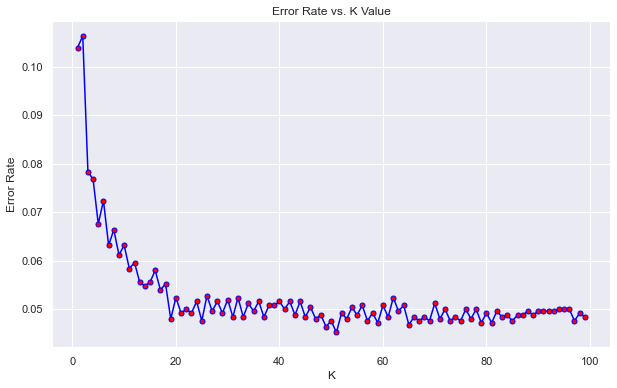

In [131]:
#Plotting Error Rate vs. K Value
plt.figure(figsize=(10,6))
plt.plot(range(1,n),error_rate,color='blue', marker='o', markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [132]:
#Generating KNN Classifier
knn = KNeighborsClassifier(n_neighbors = m)
trainStartTime = time.time()
knn.fit(X_train,y_train)
trainEndTime=time.time()
trainingRuntime=trainEndTime-trainStartTime
print("Training time = " + str(trainingRuntime))

#Testing and Evaluations
testStartTime = time.time()
pred = knn.predict(X_test)
testEndTime=time.time()
testingRuntime = testEndTime-testStartTime
print("Testing time = " + str(testingRuntime))
print("Total Computational time = " + str(testingRuntime + trainingRuntime))
error = np.mean(pred != y_test)
print("Error rate for KNN = ",error*100," %")
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion matrix with k = ", m," is")
print(confusion_matrix(y_test,pred))


Training time = 0.012088775634765625
Testing time = 0.6942331790924072
Total Computational time = 0.7063219547271729
Error rate for KNN =  4.52  %
Confusion matrix with k =  51  is
[[1631   12]
 [ 101  756]]


In [133]:
############################# KNN : Finding Optimum K value with cross validation ########################

meanAccuracyScore = []
StartTime = time.time()
for j in range(1,n):
    knn = KNeighborsClassifier(n_neighbors=j)
    meanAccuracyScore.append(np.mean(cross_val_score(knn, X_train,y_train, cv=10, scoring='accuracy')))
EndTime=time.time()
print("Time elapsed : ",EndTime - StartTime)
print("Optimum value of K for 10 fold cross validation is " + str(meanAccuracyScore.index(max(meanAccuracyScore))+1) + " with an accuracy score of "+ str(max(meanAccuracyScore)))


Time elapsed :  147.34741115570068
Optimum value of K for 10 fold cross validation is 29 with an accuracy score of 0.9482666666666667


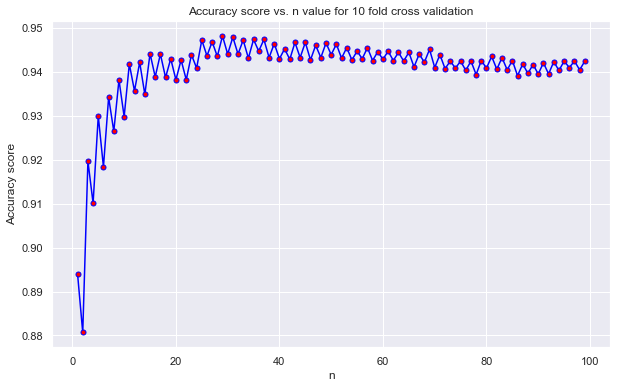

In [134]:
#Plotting Error Rate vs. K Value
plt.figure(figsize=(10,6))
plt.plot(range(1,n),meanAccuracyScore,color='blue', marker='o', markerfacecolor='red', markersize=5)
plt.title('Accuracy score vs. n value for 10 fold cross validation')
plt.xlabel('n')
plt.ylabel('Accuracy score')
plt.show()
m = meanAccuracyScore.index(max(meanAccuracyScore))+1

In [135]:
#generating output classifier with optimatal estimator derived using cross validation process
knn = KNeighborsClassifier(n_neighbors = m)
trainStartTime = time.time()
knn.fit(X_train,y_train)
trainEndTime=time.time()
trainingRuntime=trainEndTime-trainStartTime
print("Training time = " + str(trainingRuntime))

#Predictions and Evaluations
testStartTime = time.time()
pred = knn.predict(X_test)
testEndTime=time.time()
testingRuntime = testEndTime-testStartTime
print("Testing time = " + str(testingRuntime))
print("Total Computational time = " + str(testingRuntime + trainingRuntime))
from sklearn.metrics import classification_report,confusion_matrix
error = np.mean(pred != y_test)
print("Error rate for KNN = ",error*100," %")
print("Confusion matrix with k = ",m," is :")
cf_matrix= confusion_matrix(y_test,pred)
print(cf_matrix)
precision = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print("Precision = ",precision)
specificity=cf_matrix[1,1]/(cf_matrix[0,1]+cf_matrix[1,1])
print("Specificity = ",specificity)
recall = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[1,0])
print("Recall = ",recall)

Training time = 0.010027170181274414
Testing time = 0.6887798309326172
Total Computational time = 0.6988070011138916
Error rate for KNN =  4.92  %
Confusion matrix with k =  29  is :
[[1616   27]
 [  96  761]]
Precision =  0.9835666463785758
Specificity =  0.9657360406091371
Recall =  0.9439252336448598


[0.23 0.   0.   ... 0.03 0.95 0.02]


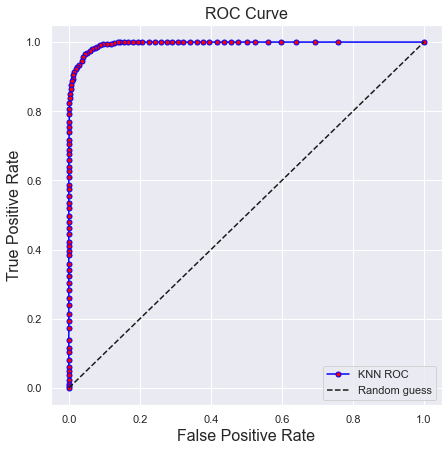

In [115]:
############################# KNN : Custom ROC  ###############################
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr
def roc_from_scratch(probabilities, y_test, partitions=n):
    roc = np.array([])
    for i in range(partitions + 2 ):
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
    return roc.reshape(-1, 2)
plt.figure(figsize=(7,7))
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train,y_train)
pred_i = knn.predict(X_test)
prob_vector = knn.predict_proba(X_test)
prob_vector = prob_vector[:, 1]
print(prob_vector)
ROC = roc_from_scratch(prob_vector,y_test,partitions=n)
plt.plot(ROC[:,0],ROC[:,1],color='blue', marker='.', markerfacecolor='red', markersize=10,label='KNN ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.title('ROC Curve',fontsize=16)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.legend()
plt.show()

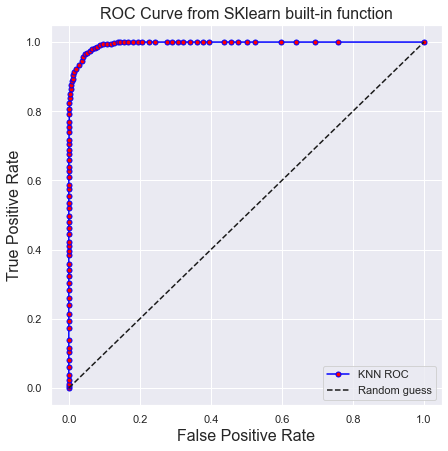

In [116]:
######################### KNN : ROC built-in fn ###########################

plt.figure(figsize=(7,7))
fpr, tpr, thresholds = roc_curve(y_test, prob_vector)
plt.plot(fpr,tpr,color='blue', marker='.', markerfacecolor='red', markersize=10,label='KNN ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.title('ROC Curve from SKlearn built-in function',fontsize=16)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.legend()
plt.show()

In [117]:
############################ Naive Bayes Classifier ##################################
# Training the classifier

gnb = GaussianNB()
startTime = time.time()
y_pred = gnb.fit(X_train, y_train)
endTime = time.time()
trainingRuntime = endTime-startTime
print("Training using Naive Bayes classifier = ",trainingRuntime," seconds")

#Cross validation
scores = cross_val_score(gnb, X_train, y_train, cv=10)
print("Cross val scores :\n" + str(scores))
print("Mean cross val score : ", scores.mean())

# Testing and Evaluating the classifier
startTime = time.time()
prediction = gnb.predict(X_test)
endTime = time.time()
testingRuntime = endTime-startTime
print("Testing time for Naive Bayes classifier = ",testingRuntime," seconds")
print("Total computational time for the Naive Bayes classification model = ",(trainingRuntime + testingRuntime)," seconds")

incorrect = (y_test != prediction).sum()
print("Percentage error = ", (incorrect/len(y_test))*100, " % ")
print("Confusion matrix = ",)
cf_matrix= confusion_matrix(y_test,prediction)
print(cf_matrix)
precision = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print("Precision = ",precision)
specificity=cf_matrix[1,1]/(cf_matrix[0,1]+cf_matrix[1,1])
print("Specificity = ",specificity)
recall = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[1,0])
print("Recall = ",recall)

Training using Naive Bayes classifier =  0.004001617431640625  seconds
Cross val scores :
[0.97866667 0.976      0.98266667 0.98133333 0.976      0.984
 0.98       0.97733333 0.98       0.98133333]
Mean cross val score :  0.9797333333333335
Testing time for Naive Bayes classifier =  0.0020012855529785156  seconds
Total computational time for the Naive Bayes classification model =  0.006002902984619141  seconds
Percentage error =  2.1999999999999997  % 
Confusion matrix = 
[[1608   35]
 [  20  837]]
Precision =  0.9786975045648204
Specificity =  0.9598623853211009
Recall =  0.9877149877149877


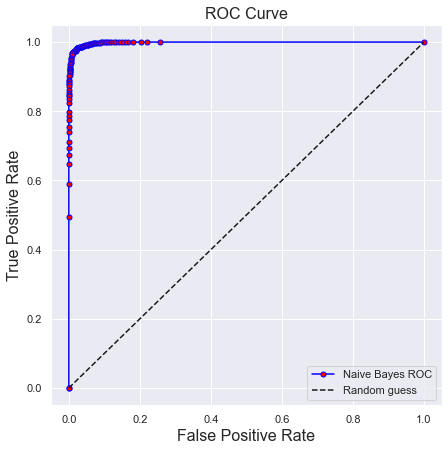

In [118]:
############################# Custom Naive Bayes ROC  ###############################

def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 2):
        threshold_vector = np.greater_equal(
            probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
    return roc.reshape(-1, 2)

#ploting custom ROC for Naive Bayes classifier
plt.figure(figsize=(7, 7))
gnb = GaussianNB()
gnb.fit(X_train, y_train)
prediction = gnb.predict(X_test)
prob_vector = gnb.predict_proba(X_test)
prob_vector = prob_vector[:, 1]
ROC = roc_from_scratch(prob_vector, y_test, partitions=100)
plt.plot(ROC[:, 0], ROC[:, 1], color='blue', marker='.', markerfacecolor='red', markersize=10, label ='Naive Bayes ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.title('ROC Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()

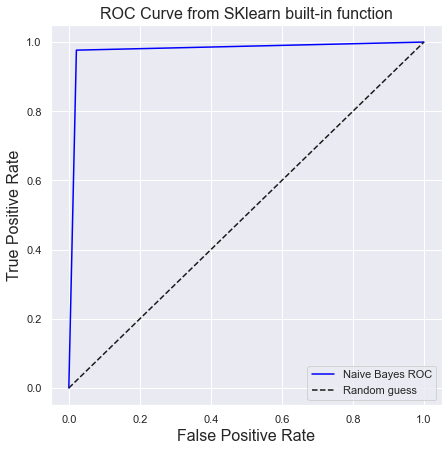

In [119]:
########################### Naive Bayes: ROC built-in fn #################################

fpr, tpr, thresholds = roc_curve(y_test, prediction)
# create plot
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, color='Blue', label='Naive Bayes ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate',fontsize=16)
_ = plt.ylabel('True Positive Rate', fontsize=16)
_ = plt.title('ROC Curve from SKlearn built-in function',fontsize = 16)
_ = plt.legend()
plt.show()

In [120]:
####################### AdaBoost Classifier: Optimum N_estimator value without Cross validation #######################
max_score=0
opt_estimator=0
parameters = range(10,101,10)
for i in parameters:
    clf = AdaBoostClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    scores = clf.score(X_test, y_test)
    print("\nN_estimators : ",i)
    print("Classifier scores :\n"+ str(scores))
    if scores.mean()>max_score:
        max_score = scores.mean()
        opt_estimator = i
    print("--------------------------------------------------")

print("\nOptimal number of estimater without cross validation : ", opt_estimator)


N_estimators :  10
Classifier scores :
1.0
--------------------------------------------------

N_estimators :  20
Classifier scores :
1.0
--------------------------------------------------

N_estimators :  30
Classifier scores :
1.0
--------------------------------------------------

N_estimators :  40
Classifier scores :
1.0
--------------------------------------------------

N_estimators :  50
Classifier scores :
1.0
--------------------------------------------------

N_estimators :  60
Classifier scores :
1.0
--------------------------------------------------

N_estimators :  70
Classifier scores :
1.0
--------------------------------------------------

N_estimators :  80
Classifier scores :
1.0
--------------------------------------------------

N_estimators :  90
Classifier scores :
1.0
--------------------------------------------------

N_estimators :  100
Classifier scores :
1.0
--------------------------------------------------

Optimal number of estimater without cross valida

In [136]:
#generating AdaBoost classifier with optimum N_estimator value derived without using cross validation process
clf = AdaBoostClassifier(n_estimators = opt_estimator)
startTime = time.time()
clf.fit(X_train, y_train)
trainingTime = time.time() - startTime
print("Training Time : ", trainingTime , " Seconds ")
startTime = time.time()
pred_class = clf.predict(X_test)
testingTime = time.time() - startTime
print("Testing Time : ", testingTime , " Seconds ")
print("Total computational time : ", testingTime + trainingTime, " Seconds")
pred_score = clf.score(X_test,y_test)
#print(" Prediction : \n",pred_class)
print("Prediction score :  ",pred_score)
error = np.mean(pred_class != y_test)
print("Error rate for KNN = ",error*100," %")
print("Confusion Matrix : \n", confusion_matrix(y_test, pred_class))
print("#####################################################")

Training Time :  0.021989107131958008  Seconds 
Testing Time :  0.002001047134399414  Seconds 
Total computational time :  0.023990154266357422  Seconds
Prediction score :   1.0
Error rate for KNN =  0.0  %
Confusion Matrix : 
 [[1643    0]
 [   0  857]]
#####################################################


In [122]:
############################# AdaBoost Classifier: Optimum N_estimator value with cross validation #####################

print("Finding optimal number of estimator using cross validation method ")
max_score=0
opt_estimator=0
parameters = range(10,101,10)
for i in parameters:
    clf = AdaBoostClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    print("\nN_estimators : ",i)
    print("Cross val scores :\n" + str(scores))
    print("Mean cross val score : ", scores.mean())
    if scores.mean()>max_score:
        max_score = scores.mean()
        opt_estimator = i
    print("----------------------------------------------------------")
print("\nOptimal number of estimator using cross validation: ", opt_estimator)

Finding optimal number of estimator using cross validation method 

N_estimators :  10
Cross val scores :
[1.         0.99866667 1.         1.         1.         1.
 1.         1.         1.         0.99866667]
Mean cross val score :  0.9997333333333334
----------------------------------------------------------

N_estimators :  20
Cross val scores :
[1.         0.99866667 1.         1.         1.         1.
 1.         1.         1.         0.99866667]
Mean cross val score :  0.9997333333333334
----------------------------------------------------------

N_estimators :  30
Cross val scores :
[1.         0.99866667 1.         1.         1.         1.
 1.         1.         1.         0.99866667]
Mean cross val score :  0.9997333333333334
----------------------------------------------------------

N_estimators :  40
Cross val scores :
[1.         0.99866667 1.         1.         1.         1.
 1.         1.         1.         0.99866667]
Mean cross val score :  0.9997333333333334
--------

In [123]:
#generating output classifier with optimatal estimator derived using cross validation process
clf = AdaBoostClassifier(n_estimators = opt_estimator)
startTime = time.time()
clf.fit(X_train, y_train)
trainingTime = time.time() - startTime
print("Training Time : ", trainingTime , " Seconds ")
startTime = time.time()
pred_class = clf.predict(X_test)
testingTime = time.time() - startTime
print("Testing Time : ", testingTime , " Seconds ")
print("Total computational time : ", testingTime + trainingTime, " Seconds")
pred_score = clf.score(X_test,y_test)
print("Prediction score :  ",pred_score)
error = np.mean(pred_class != y_test)
print("Error rate for AdaBoost = ",error*100," %")
print("Confusion Matrix : ")
cf_matrix= confusion_matrix(y_test,pred_class)
print(cf_matrix)
precision = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print("Precision = ",precision)
specificity=cf_matrix[1,1]/(cf_matrix[0,1]+cf_matrix[1,1])
print("Specificity = ",specificity)
recall = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[1,0])
print("Recall = ",recall)

Training Time :  0.016526460647583008  Seconds 
Testing Time :  0.0010013580322265625  Seconds 
Total computational time :  0.01752781867980957  Seconds
Prediction score :   1.0
Error rate for AdaBoost =  0.0  %
Confusion Matrix : 
[[1643    0]
 [   0  857]]
Precision =  1.0
Specificity =  1.0
Recall =  1.0


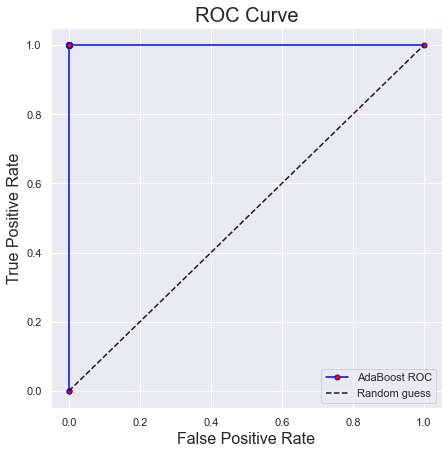

In [124]:
############################# AdaBoost Classifier: Custom ROC  ###############################
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr
n=100
def roc_from_scratch(probabilities, y_test, partitions=n):
    roc = np.array([])
    for i in range(partitions + 2):
        
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
    return roc.reshape(-1, 2)

sns.set()
plt.figure(figsize=(7,7))
pred_i = clf.predict(X_test)
prob_vector = clf.predict_proba(X_test)
prob_vector = prob_vector[:, 1]
ROC = roc_from_scratch(prob_vector,y_test,partitions=n)
plt.plot(ROC[:,0],ROC[:,1],color='blue', marker='o', markerfacecolor='red', markersize=5, label='AdaBoost ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.title('ROC Curve',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.legend()
plt.show()

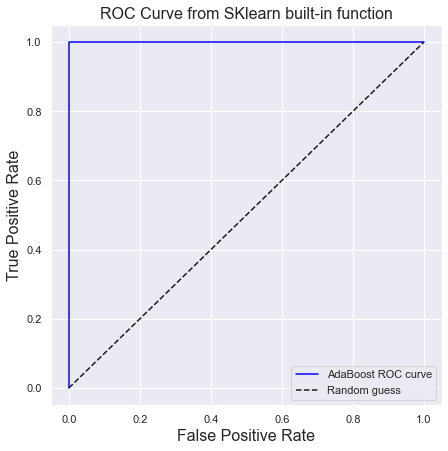

In [125]:
################ AdaBoost Classifier: ROC built-in fn ###################
fpr, tpr, thresholds = roc_curve(y_test, pred_class)
# create plot
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, label='AdaBoost ROC curve',color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate',fontsize=16)
_ = plt.ylabel('True Positive Rate', fontsize=16)
_ = plt.title('ROC Curve from SKlearn built-in function',fontsize = 16)
_ = plt.legend()
plt.show()
print("")